In [17]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [18]:
p=pd.read_csv('Sample.csv')   #Enter the complete path of the file
q=DataFrame(p)  #create a dataframe


In [20]:

def caly(lat):   #formula to convert lat-long in cartesian co-ordinates
    
    lat=float(lat)
    dy = 6371*(math.log(math.tan(((math.pi)/4)+(lat)*(math.pi)/360)))
    return dy
    

In [21]:
def calx(x):    #formula to convert lat-long in cartesian co-ordinates
    x=float(x)
    n=6371*x*(math.pi)/180
    return n
    

In [22]:

q['y']=q['Latitude'].apply(caly)

In [23]:
q['x']=q['Longitude'].apply(calx)

In [24]:
def arr(x):     #combine x&y coordinates
    a=[]
    a.append(x['x'])
    a.append(x['y'])
    return a
    

In [25]:
q['coordinates']=q.apply(arr,axis=1)

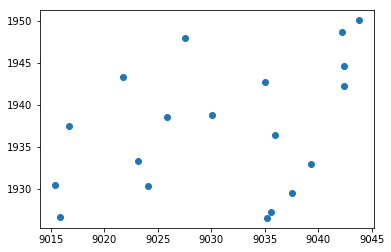

In [26]:
plt.scatter(q['x'],q['y'])

In [27]:
b=[]                                  #make an array of all the coordinates
for i in range(len(q.index)):
    b.append(q.loc[i,'coordinates'])
    


In [28]:
r=input("Please enter a radius:-")

Please enter a radius:12


In [29]:
n=1    #set no. of cluster=1

while(n<len(q.index)):
    flag=1                  #assume all the datapoints lie within the given radius
    kmeans = KMeans(n, n_init=10)    #Find the optimum locations of hub 
    kmeans.fit(b)
    labels = kmeans.predict(b)
    C = kmeans.cluster_centers_
    l=kmeans.transform(b)

    for i in range(len(q.index)):
        dist=l[i][labels[i]]    #calculate the distance of each hub and corr. village
        if dist>r:              
            n=n+1 
            flag=0           
            break

    if flag==1:
        
        print 'number of centers required='+str(n)
        break
        


number of centers required=3


In [30]:
lat=[]   #initialize lat & long matrices
lon=[]

In [31]:
for i in range(len(C)):
    
    m=((math.atan(math.exp(C[i][1]/6371)))-(math.pi/4))*(360/math.pi)
    n=(C[i][0]/6371)*(180/math.pi)
    
    lat.append(m)
    lon.append(n)

In [32]:
alpha=q['x']
beta=q['y']

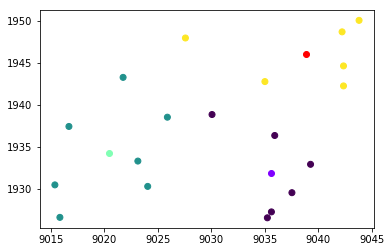

In [33]:
plt.scatter(alpha,beta,c=labels)
color=iter(cm.rainbow(np.linspace(0,1,len(C),endpoint=1)))
for i in range(len(C)):
 
 c=next(color)

 plt.scatter(C[i][0],C[i][1],c=c)


In [34]:
for i in range(len(q.index)):
        
         q.loc[i,'labels']=labels[i]
         j=labels[i]
         q.loc[i,'center latitude']=lat[j]
         q.loc[i,'center longitude']=lon[j]

In [35]:
del q['x'], q['coordinates'], q['y']

In [36]:
q.to_csv('final.csv',index=0)